# 2D method with Different Velocity Cuts

#### We compare u-r plots with velocity cuts of 150 km/s and 600 km/s

In [15]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

import seaborn as sns

In [2]:
dwarf_table = Table.read('dwarf_table.txt', format = 'ascii.commented_header')
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


In [3]:
gal_table = Table.read('gal_table.txt', format = 'ascii.commented_header')
gal_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,gamma_ratio
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32
-99.0,0.0,146.714215072841,-1.0412800233313741,0.021222278475761414,-19.30365562438965,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9,0,1
1.0,1.0,146.6285851269414,-0.7651620976591762,0.0646563172340393,-19.97649574279785,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2,1,2
-99.0,0.0,146.63170644325592,-0.9883467023052999,0.05265425145626068,-18.431812286376953,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2,2,1
1.0,1.0,146.9341288729797,-0.6704053610430766,0.12127048522233963,-21.559162139892578,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9,3,2
-99.0,1.0,146.9634997327016,-0.5447758299302171,0.055980585515499115,-19.10099220275879,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2,4,1


## 2D Distance Method v < 150 km/s

In [7]:
from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord

h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant

#creating the new columns
dwarf_table['150_2D_neighbor_ID'] = -1
dwarf_table['150_2D_neighbor_dist'] = np.nan

#columns for virial radius normalization 
dwarf_table['150_2D_neighbor_ID_vir'] = -1
dwarf_table['150_2D_neighbor_dist_vir'] = np.nan

#gamma ratio in virial radius calculation
gal_table['gamma_ratio'] = 1 
gal_table['gamma_ratio'][gal_table['aimc'] == 1] = 2 
gal_table['gamma_ratio'][gal_table['aimc'] == 2] = 2
                          


for i in range(len(dwarf_table)):
    neighbor_list=(abs(dwarf_table['Z'][i]-gal_table['Z'])*const.c) < 150*u.km/u.s #galaxies in relative velocity constraint
    
    di = gal_table['ID#'] == dwarf_table['ID'][i] #finding the dwarf galaxy inside larger table
    neighbor_list[di]= False #removing from its neighbor list
   
    #avg distance to systems (r average)
    avg_dist = .5*const.c.to('km/s')*(dwarf_table['Z'][i]+gal_table['Z'][neighbor_list])/H0 
    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=avg_dist)
    neighbor_pos = SkyCoord(ra=gal_table['RA'][neighbor_list]*u.degree, 
                            dec=gal_table['DEC'][neighbor_list]*u.degree, distance=avg_dist)
    
    neighbor_dist=neighbor_pos.separation_3d(dwarf_pos) #separation calculation of all possible neighbors
    
    nearby_neigh_index = np.argmin(neighbor_dist) #finding closest neighbor
    
    dwarf_table['150_2D_neighbor_dist'][i] = neighbor_dist[nearby_neigh_index].value #unit Mpc, adding to dwarf table
    
    neighbor_id = gal_table['ID#'][neighbor_list] 
    dwarf_table['150_2D_neighbor_ID'][i] = neighbor_id[nearby_neigh_index] #adding neighbor galaxy's ID to dwarf table
    
    
    # Doing calculation with virial radius normalization
    
    M = gal_table['ELPETRO_ABSMAG_r'][neighbor_list] #absolute magnitude of neighboring galaxies
    
    gamma_ratio = gal_table['gamma_ratio'][neighbor_list] #gamma ratio of neighboring galaxies
    
    
    L_ratio = 10**((-20-M)/2.5) #luminosity ratio for virial radius calcuation
    
    r_vir = ((3*gamma_ratio*L_ratio)/(4*740*0.0223*np.pi))**(1./3) # calculating virial radius of all neighboring galaxies
    
    
    neighbor_dist_vir = neighbor_dist / r_vir # normalizing distance
    
    nearby_neigh_index_vir = np.nanargmin(neighbor_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['150_2D_neighbor_dist_vir'][i] = neighbor_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    dwarf_table['150_2D_neighbor_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table

C:\Users\caeho\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


## 2D Distance Method v < 600 km/s


In [27]:
#creating the new columns
dwarf_table['600_2D_neighbor_ID'] = -1
dwarf_table['600_2D_neighbor_dist'] = np.nan

#columns for virial radius normalization 
dwarf_table['600_2D_neighbor_ID_vir'] = -1
dwarf_table['600_2D_neighbor_dist_vir'] = np.nan

#gamma ratio in virial radius calculation
gal_table['gamma_ratio'] = 1 
gal_table['gamma_ratio'][gal_table['aimc'] == 1] = 2 
gal_table['gamma_ratio'][gal_table['aimc'] == 2] = 2
                          


for i in range(len(dwarf_table)):
    neighbor_list=(abs(dwarf_table['Z'][i]-gal_table['Z'])*const.c) < 600*u.km/u.s #galaxies in relative velocity constraint
    
    di = gal_table['ID#'] == dwarf_table['ID'][i] #finding the dwarf galaxy inside larger table
    neighbor_list[di]= False #removing from its neighbor list
   
    #avg distance to systems (r average)
    avg_dist = .5*const.c.to('km/s')*(dwarf_table['Z'][i]+gal_table['Z'][neighbor_list])/H0 
    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=avg_dist)
    neighbor_pos = SkyCoord(ra=gal_table['RA'][neighbor_list]*u.degree, 
                            dec=gal_table['DEC'][neighbor_list]*u.degree, distance=avg_dist)
    
    neighbor_dist=neighbor_pos.separation_3d(dwarf_pos) #separation calculation of all possible neighbors
    
    nearby_neigh_index = np.argmin(neighbor_dist) #finding closest neighbor
    
    dwarf_table['600_2D_neighbor_dist'][i] = neighbor_dist[nearby_neigh_index].value #unit Mpc, adding to dwarf table
    
    neighbor_id = gal_table['ID#'][neighbor_list] 
    dwarf_table['600_2D_neighbor_ID'][i] = neighbor_id[nearby_neigh_index] #adding neighbor galaxy's ID to dwarf table
    
    
    # Doing calculation with virial radius normalization
    
    M = gal_table['ELPETRO_ABSMAG_r'][neighbor_list] #absolute magnitude of neighboring galaxies
    
    gamma_ratio = gal_table['gamma_ratio'][neighbor_list] #gamma ratio of neighboring galaxies
    
    
    L_ratio = 10**((-20-M)/2.5) #luminosity ratio for virial radius calcuation
    
    r_vir = ((3*gamma_ratio*L_ratio)/(4*740*0.0223*np.pi))**(1./3) # calculating virial radius of all neighboring galaxies
    
    
    neighbor_dist_vir = neighbor_dist / r_vir # normalizing distance
    
    nearby_neigh_index_vir = np.nanargmin(neighbor_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['600_2D_neighbor_dist_vir'][i] = neighbor_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    dwarf_table['600_2D_neighbor_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table

C:\Users\caeho\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [28]:
dwarf_table

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir,150_2D_neighbor_ID,150_2D_neighbor_dist,150_2D_neighbor_ID_vir,150_2D_neighbor_dist_vir,600_2D_neighbor_ID,600_2D_neighbor_dist,600_2D_neighbor_ID_vir,600_2D_neighbor_dist_vir
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282840855419636,-15.534673690795898,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463,49,0.18150555227643062,585714,1.3634632736552832,49,0.18150555227643062,585714,1.3634632736552832
106.68,1.0,146.85676432411947,-0.27409664376066756,0.02196459472179413,-16.7003231048584,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274,79,0.6704515915025077,92,2.414294086314313,79,0.6704515915025077,92,2.414294086314313
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323036760092,-15.290872573852539,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734,585695,0.03566333080947978,585695,0.4656865781731124,585695,0.03566333080947978,639857,0.46035335826141743
199.39,1.0,146.00780426178756,-0.6422574964819474,0.004776299931108952,-15.831652641296387,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821,639857,0.007285418726886855,639857,0.08617609941599277,585695,0.006393283611156658,585695,0.083482566002455
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635022610426,-16.34455108642578,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549,585714,0.0705972835197574,585714,0.4172619779731377,585714,0.0705972835197574,585714,0.4172619779731377
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895168542862,-16.594152450561523,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,80,0.038323438909891316,92,0.17226127693210824,92,0.10268810550034341,92,0.3052372880294029,80,0.038323438560261415,92,0.1722612833578244,80,0.038323438560261415,92,0.1722612833578244
0.0,1.0,145.3209420527222,0.771115298508063,0.00658948952332139,-14.810564994812012,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,208,0.16133006586884238,208,0.576340261650062,208,0.6516081633066332,208,2.3278241244801396,208,0.16133006393599078,208,0.5763402523140405,208,0.16133006393599078,208,0.5763402523140405
-99.0,1.0,145.4212238164792,0.5359777701124617,0.1459859162569046,-14.866592407226562,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,206,0.23624643923335842,206,0.5428900018158784,206,0.53709656480362,206,1.2342380947105809,206,0.2362464208392196,206,0.5428899579344142,206,0.2362464208392196,206,0.5428899579344142
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164106935263,-14.2352876663208,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,55137,0.13915957213413985,55243,0.8924983833408165,55137,0.18685834815465546,208,1.4133282793228592,55137,0.13915957997096678,55243,0.8

## Profile Historgrams and Linear Regressions

In [11]:
# Separating into Void, Wall, or Other Dwarf Galaxies

dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

## Profile Histogram Function

In [16]:
def profilehist(x, y, w=None, bins=10, uncertainty='stderr'):
    """Compute a profile histogram given x, y and optional weights.
    
    Parameters
    ----------
    x : (N,) array_like
        Sequence of values to be binned.
    y : (N,) array_like
        Data on which the statistic will be computed.
    w : None or (N,) array_like
        Weights for each data point y.
    bins : int or array_like
        If int, define equal-length bins given by data min/max range; else, user-defined bin edges.
    uncertainty : str
        'stderr' to compute standard error on the mean; 'sample' for sample uncertainty
        
    Returns
    -------
    xc : array of dtype float
        Bin centers in x.
    yavg : array of dtype float
        Average in each bin.
    yerr : array of dtype float
        Uncertainty in each bin (sample error or error on the mean).
    """
    # Default to equal weights in each bin.
    if w is None:
        w = np.ones_like(y, dtype=np.float64)

    # Compute weighted sums and construct the weighted means and uncertainties.
    (Y, E, W), edges, idx = binned_statistic(x, [w*y, w*y**2, w], bins=bins, statistic='sum')
    yavg = Y/W
    ystd = np.sqrt(E/W - yavg**2)
    yerr = ystd/np.sqrt(W)

    # Compute bin centers.
    xc = 0.5*(edges[1:] + edges[:-1])
    
    if uncertainty == 'sample':
        return xc, yavg, ystd
    elif uncertainty == 'stderr':
        return xc, yavg, yerr
    else:
        raise ValueError(f'uncertainty={uncertainty} unknown; allowed: "stderr" and "sample"')

## 2D Method Color (u-r) v<150 km/s


### Profile Histogram

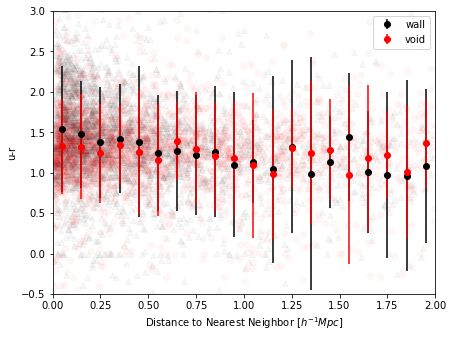

In [17]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
   
    d = dwarf_table['150_2D_neighbor_dist'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)

    xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.linspace(0,3,31), uncertainty='sample')
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
    ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)

    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=([0,2]), ylim=([-0.5,3]));
    ax.legend();

    fig.savefig('150_ur_2D_PH.png')

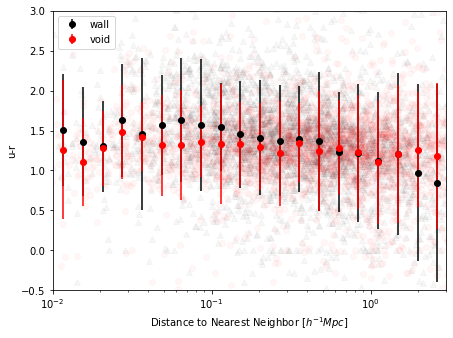

In [18]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
   
    d = dwarf_table['150_2D_neighbor_dist'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)

    xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.logspace(np.log10(0.01),np.log10(3),21), uncertainty='sample')
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
    ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)

    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=([0.01,3]), ylim=([-0.5,3]));
    ax.set_xscale('log') #changing x axis to a logarithmic scale

    ax.legend();

    fig.savefig('150_ur_2D_PH_log.png')

### Linear Regression

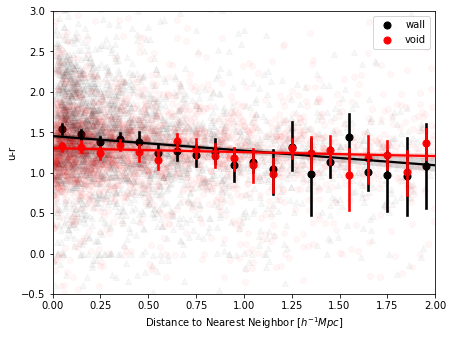

In [19]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d = dwarf_table['150_2D_neighbor_dist'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
        
    xedges = np.linspace(0,3,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
        
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=(0,2), ylim=(-0.5,3));
        
    ax.legend()
        
    fig.savefig('150_ur_2D_LR.png')

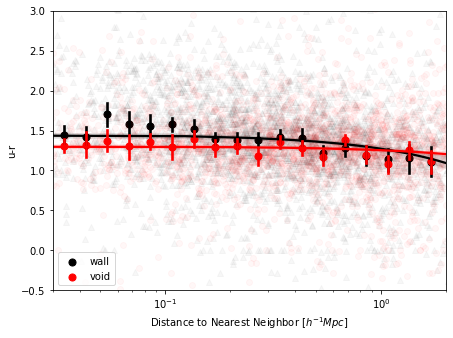

In [21]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d = dwarf_table['150_2D_neighbor_dist'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
    
    logbins = np.logspace(np.log10(0.03),np.log10(3),21) #making bins even logarithmicly  
    xcenters = 0.5*(logbins[1:] + logbins[:-1])
        
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
          
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=(0.03,2), ylim=(-0.5,3));
    
    ax.set_xscale('log')
    
    ax.legend()
    
    fig.savefig('150_ur_2D_LR_log.png')

## 2D Virial Method Color (u-r) v<150 km/s


### Profile Histogram

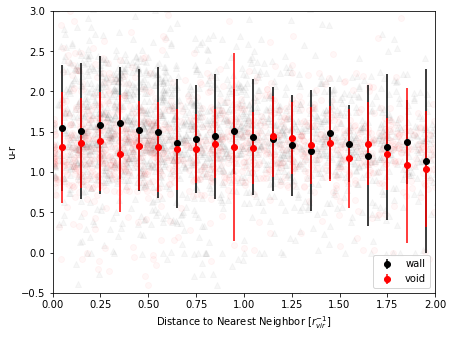

In [22]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
   
    d = dwarf_table['150_2D_neighbor_dist_vir'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)

    xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.linspace(0,3,31), uncertainty='sample')
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
    ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)

    ax.set(xlabel='Distance to Nearest Neighbor [$r^{-1}_{vir}]$', ylabel='u-r', xlim=([0,2]), ylim=([-0.5,3]));
    ax.legend();

    fig.savefig('150_ur_2D_vir_PH.png')

### Linear Regression

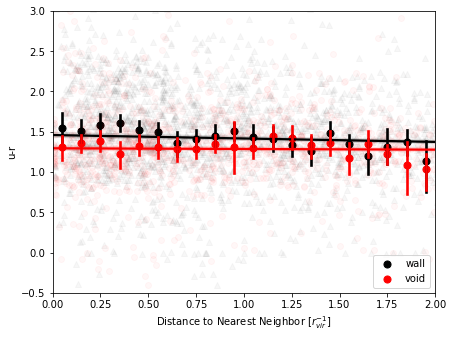

In [23]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d = dwarf_table['150_2D_neighbor_dist_vir'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
        
    xedges = np.linspace(0,3,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
        
        
    ax.set(xlabel='Distance to Nearest Neighbor [$r^{-1}_{vir}]$', ylabel='u-r', xlim=(0,2), ylim=(-0.5,3));
        
    ax.legend()
        
    fig.savefig('150_ur_2D_vir_LR.png')

## 2D Method Color (u-r) v<600 km/s

### Profile Histogram


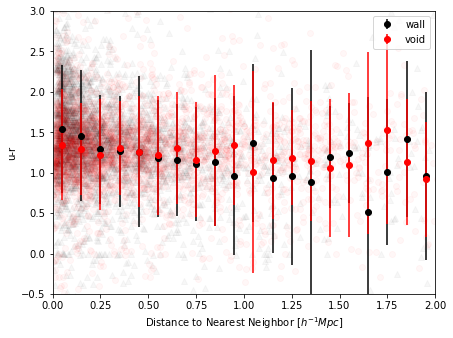

In [29]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
   
    d = dwarf_table['600_2D_neighbor_dist'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)

    xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.linspace(0,3,31), uncertainty='sample')
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
    ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)

    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=([0,2]), ylim=([-0.5,3]));
    ax.legend();

    fig.savefig('600_ur_2D_PH.png')

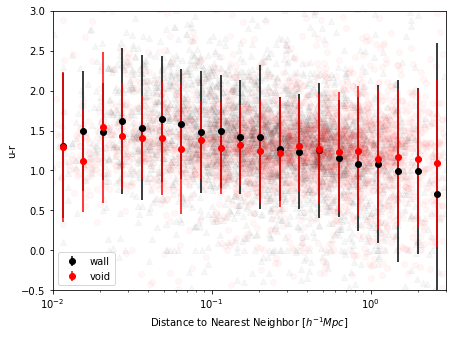

In [30]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
   
    d = dwarf_table['600_2D_neighbor_dist'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)

    xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.logspace(np.log10(0.01),np.log10(3),21), uncertainty='sample')
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
    ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)

    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=([0.01,3]), ylim=([-0.5,3]));
    ax.set_xscale('log') #changing x axis to a logarithmic scale

    ax.legend();

    fig.savefig('600_ur_2D_PH_log.png')

### Linear Regression

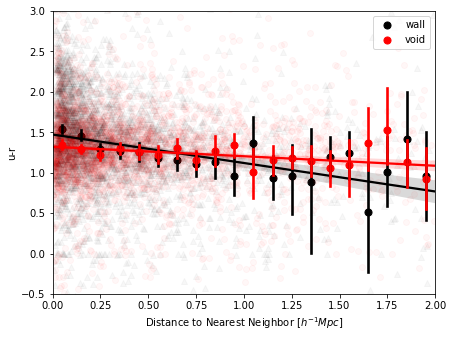

In [31]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d = dwarf_table['600_2D_neighbor_dist'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
        
    xedges = np.linspace(0,3,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
        
        
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=(0,2), ylim=(-0.5,3));
        
    ax.legend()
        
    fig.savefig('600_ur_2D_LR.png')

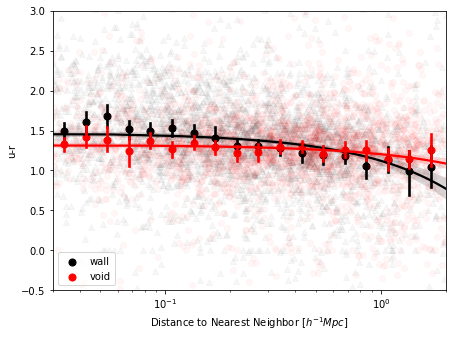

In [32]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d = dwarf_table['600_2D_neighbor_dist'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
    
    logbins = np.logspace(np.log10(0.03),np.log10(3),21) #making bins even logarithmicly  
    xcenters = 0.5*(logbins[1:] + logbins[:-1])
        
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
          
    ax.set(xlabel='Distance to Nearest Neighbor [$h^{-1}Mpc]$', ylabel='u-r', xlim=(0.03,2), ylim=(-0.5,3));
    
    ax.set_xscale('log')
    
    ax.legend()
    
    fig.savefig('600_ur_2D_LR_log.png')

## 2D Virial Method Color (u-r) v<600 km/s

### Profile Histogram

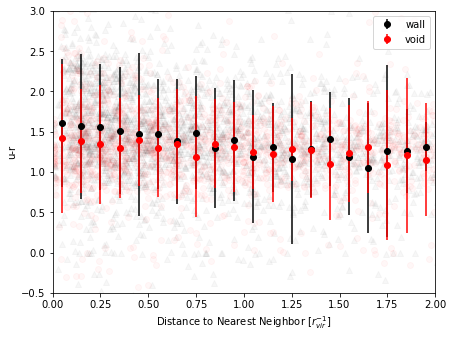

In [33]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
   
    d = dwarf_table['600_2D_neighbor_dist_vir'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)

    xc, yavg, yerr = profilehist(d[nonan], vals[nonan], bins=np.linspace(0,3,31), uncertainty='sample')
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
    ax.errorbar(xc, yavg, yerr=yerr, fmt='o', color=mc, label=label)

    ax.set(xlabel='Distance to Nearest Neighbor [$r^{-1}_{vir}]$', ylabel='u-r', xlim=([0,2]), ylim=([-0.5,3]));
    ax.legend();

    fig.savefig('600_ur_2D_vir_PH.png')

### Linear Regression

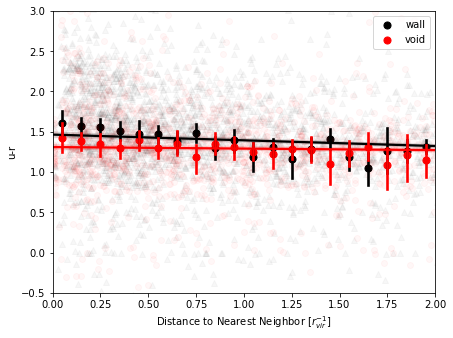

In [34]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.8), tight_layout=True)

for select, mc, label, c, m in zip([dwarf_wall, dwarf_void], ['black', 'red'], ['wall', 'void'], ['k', 'r'], ['^', 'o']):
    
    d = dwarf_table['600_2D_neighbor_dist_vir'][select]
    vals = dwarf_table['u_r'][select]
    nonan = ~np.isnan(vals)
       
    ax.scatter(d[nonan], vals[nonan], alpha=0.03, color=c, marker=m)
        
    xedges = np.linspace(0,3,31)
    xcenters = 0.5*(xedges[1:] + xedges[:-1])
        
    sns.regplot(x=d[nonan], y=vals[nonan], x_bins=xcenters, color=mc, ax=ax, label=label)
        
        
        
    ax.set(xlabel='Distance to Nearest Neighbor [$r^{-1}_{vir}]$', ylabel='u-r', xlim=(0,2), ylim=(-0.5,3));
        
    ax.legend()
        
    fig.savefig('600_ur_2D_vir_LR.png')